# TP : Prédire le prix de location de logements à Antananarivo avec une régression linéaire multiple

## Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
import joblib

# Pour les visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour afficher les graphiques dans le notebook
%matplotlib inline

## Partie 1 : Préparation des données

### Lecture du dataset brut

In [2]:
# Chargement des données
data = pd.read_csv('data_mock/logement.csv')

# Affichage des premières lignes
print("Aperçu des données :")
data.head()

Aperçu des données :


,quartier,superficie,nombre_chambres,douche_wc,type_d_acces,meublé,état_général,loyer_mensuel
0,Anosibe,64,2,interieur,moto,non,mauvais,489600
1,Analamahitsy,83,5,exterieur,voiture,oui,bon,1096800
2,Andoharanofotsy,130,3,interieur,moto,non,moyen,1190000
3,67Ha,106,4,interieur,moto,oui,mauvais,838400
4,Analakely,27,1,interieur,voiture_avec_par_parking,oui,mauvais,212800


In [3]:
# Informations sur le dataset
print("\nInformations sur le dataset :")
data.info()


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   quartier         1000 non-null   object
 1   superficie       1000 non-null   int64 
 2   nombre_chambres  1000 non-null   int64 
 3   douche_wc        1000 non-null   object
 4   type_d_acces     1000 non-null   object
 5   meublé           1000 non-null   object
 6   état_général     1000 non-null   object
 7   loyer_mensuel    1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
data.describe()


Statistiques descriptives :


,superficie,nombre_chambres,loyer_mensuel
count,1000.000000,1000.000000,1.000000e+03
mean,106.461000,3.456000,1.020997e+06
std,51.511882,1.714936,4.526890e+05
min,20.000000,1.000000,1.872000e+05
25%,61.000000,2.000000,6.636000e+05
50%,104.000000,4.000000,9.832000e+05
75%,148.000000,5.000000,1.333800e+06
max,200.000000,6.000000,2.222400e+06


In [5]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
data.isnull().sum()


Valeurs manquantes par colonne :


quartier           0
superficie         0
nombre_chambres    0
douche_wc          0
type_d_acces       0
meublé             0
état_général       0
loyer_mensuel      0
dtype: int64

In [6]:
# Exploration des variables catégorielles
print("\nDistribution des quartiers :")
data['quartier'].value_counts()

print("\nDistribution des types d'accès :")
data['type_d_acces'].value_counts()

print("\nDistribution des états généraux :")
data['état_général'].value_counts()

print("\nDistribution des types de douche/WC :")
data['douche_wc'].value_counts()

print("\nDistribution des logements meublés :")
data['meublé'].value_counts()


Distribution des quartiers :

Distribution des types d'accès :

Distribution des états généraux :

Distribution des types de douche/WC :

Distribution des logements meublés :


meublé
oui    512
non    488
Name: count, dtype: int64

### Visualisation des données

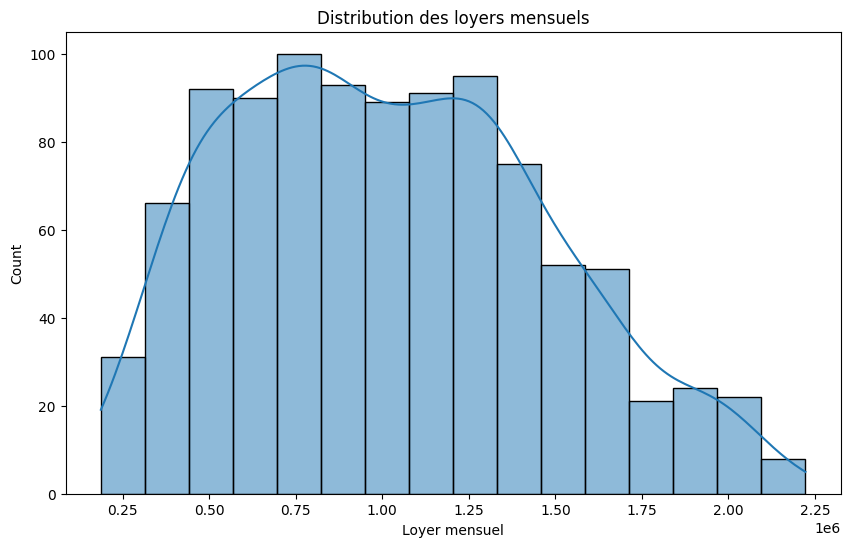

In [7]:
# Distribution de la variable cible (loyer_mensuel)
plt.figure(figsize=(10, 6))
sns.histplot(data['loyer_mensuel'], kde=True)
plt.title('Distribution des loyers mensuels')
plt.xlabel('Loyer mensuel')
plt.show()

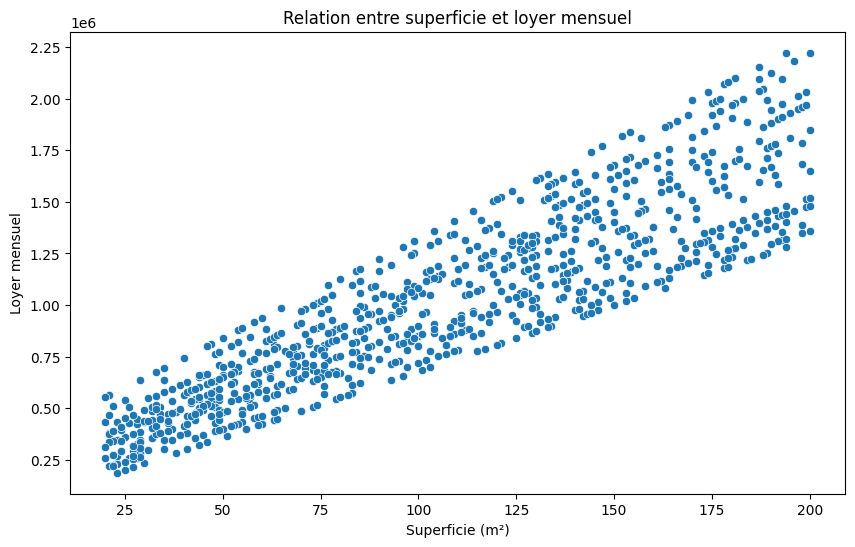

In [8]:
# Relation entre superficie et loyer mensuel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='superficie', y='loyer_mensuel', data=data)
plt.title('Relation entre superficie et loyer mensuel')
plt.xlabel('Superficie (m²)')
plt.ylabel('Loyer mensuel')
plt.show()

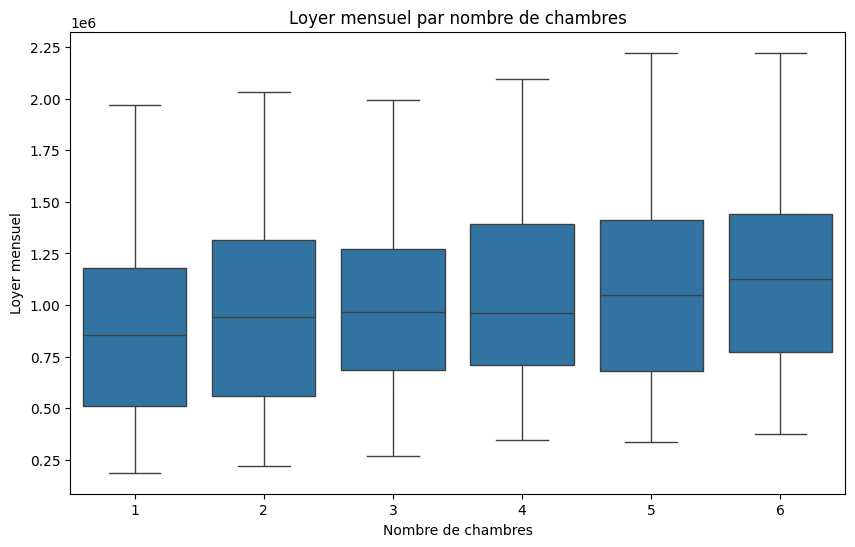

In [9]:
# Relation entre nombre de chambres et loyer mensuel
plt.figure(figsize=(10, 6))
sns.boxplot(x='nombre_chambres', y='loyer_mensuel', data=data)
plt.title('Loyer mensuel par nombre de chambres')
plt.xlabel('Nombre de chambres')
plt.ylabel('Loyer mensuel')
plt.show()

C:\Users\Ny Aro\AppData\Local\Temp\ipykernel_24860\2948820857.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quartier', y='loyer_mensuel', data=data, estimator=np.mean, ci=None)


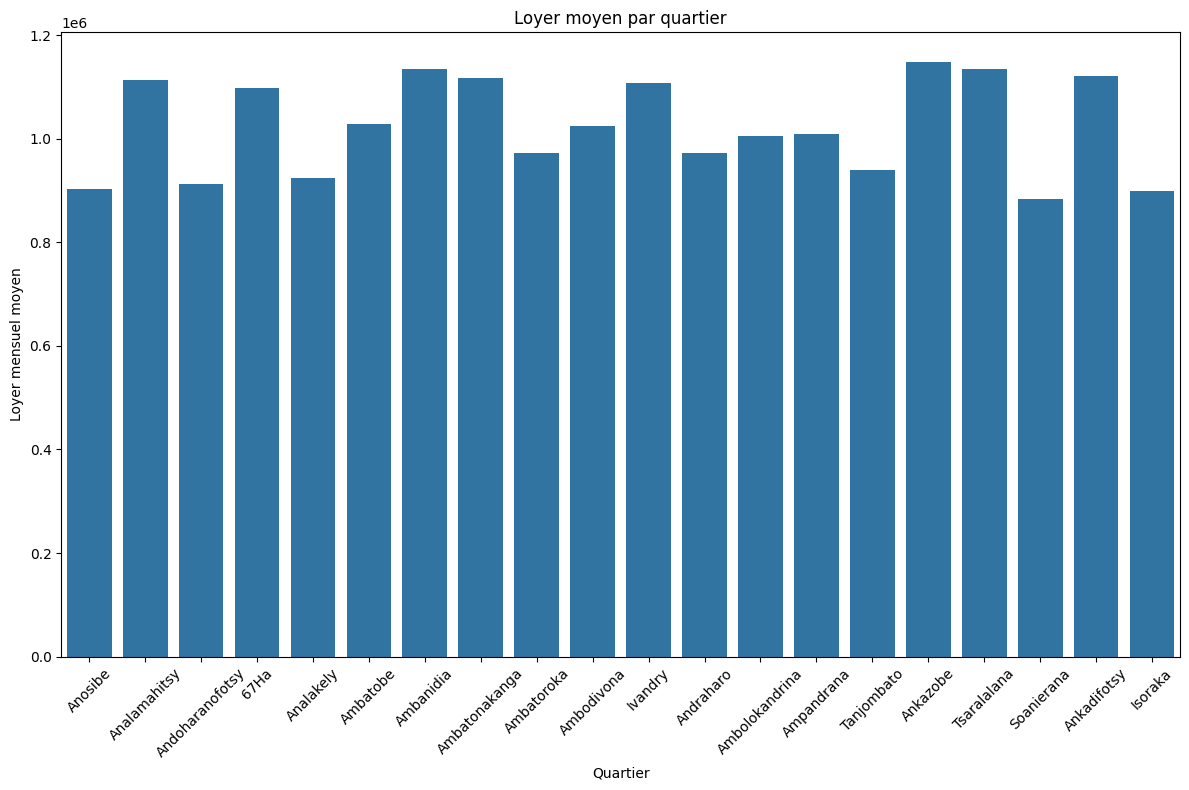

In [10]:
# Loyer moyen par quartier
plt.figure(figsize=(12, 8))
sns.barplot(x='quartier', y='loyer_mensuel', data=data, estimator=np.mean, ci=None)
plt.title('Loyer moyen par quartier')
plt.xlabel('Quartier')
plt.ylabel('Loyer mensuel moyen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

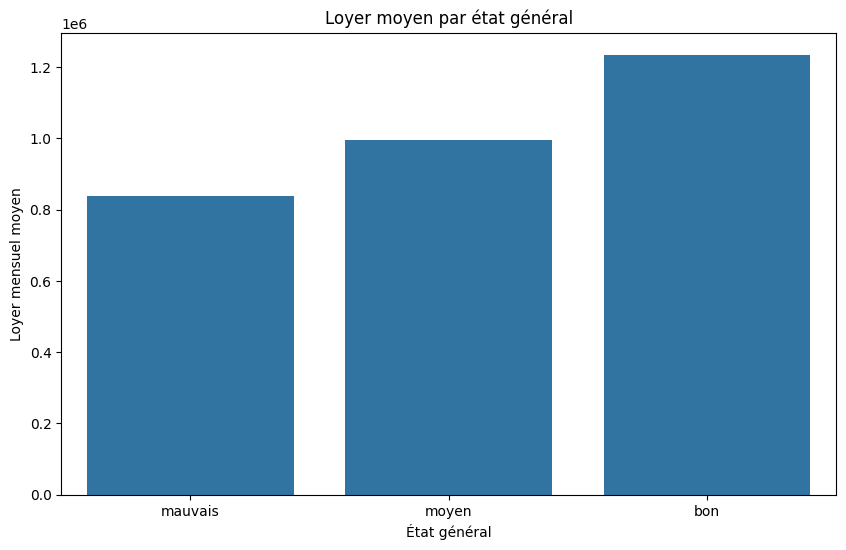

In [11]:
# Loyer moyen par état général
plt.figure(figsize=(10, 6))
sns.barplot(x='état_général', y='loyer_mensuel', data=data, estimator=np.mean, errorbar=None, order=['mauvais', 'moyen', 'bon'])
plt.title('Loyer moyen par état général')
plt.xlabel('État général')
plt.ylabel('Loyer mensuel moyen')
plt.show()

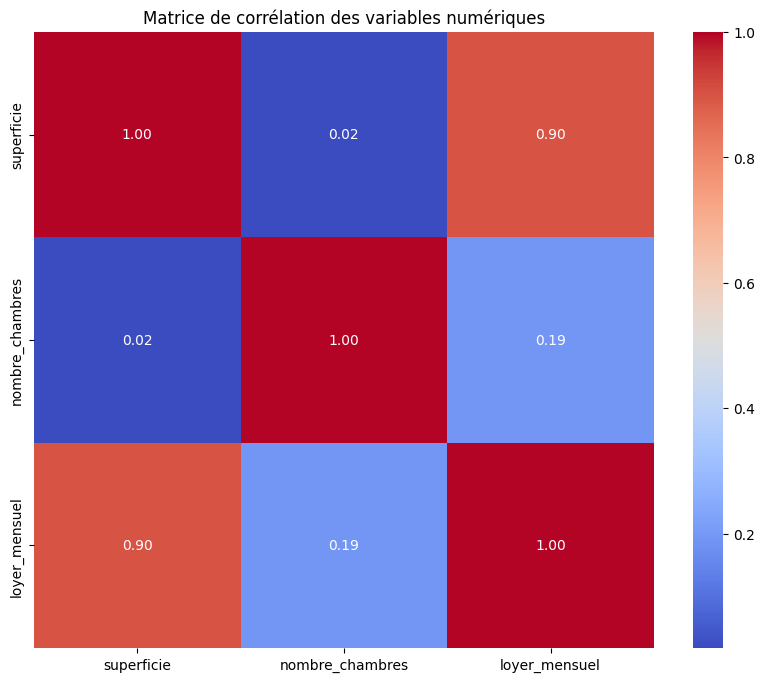

In [12]:
# Matrice de corrélation pour les variables numériques
numeric_cols = ['superficie', 'nombre_chambres', 'loyer_mensuel']
plt.figure(figsize=(10, 8))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

### Gestion des valeurs manquantes

In [13]:
# Vérification des valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Si des valeurs manquantes sont détectées, nous les traiterons ici
# Pour l'instant, supposons qu'il n'y a pas de valeurs manquantes

Valeurs manquantes par colonne :
Series([], dtype: int64)


### Encodage des variables catégorielles

In [14]:
# Séparation des features et de la variable cible
X = data.drop('loyer_mensuel', axis=1)
y = data['loyer_mensuel']

# Identification des colonnes catégorielles et numériques
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Colonnes catégorielles :", categorical_cols)
print("Colonnes numériques :", numerical_cols)

Colonnes catégorielles : ['quartier', 'douche_wc', 'type_d_acces', 'meublé', 'état_général']
Colonnes numériques : ['superficie', 'nombre_chambres']


In [15]:
# Création d'un préprocesseur pour les variables catégorielles et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Création de variables dérivées

In [16]:
# Création de variables dérivées
# Par exemple, superficie par chambre
data['superficie_par_chambre'] = data['superficie'] / data['nombre_chambres']

# Affichage des premières lignes avec la nouvelle variable
data.head()

,quartier,superficie,nombre_chambres,douche_wc,type_d_acces,meublé,état_général,loyer_mensuel,superficie_par_chambre
0,Anosibe,64,2,interieur,moto,non,mauvais,489600,32.000000
1,Analamahitsy,83,5,exterieur,voiture,oui,bon,1096800,16.600000
2,Andoharanofotsy,130,3,interieur,moto,non,moyen,1190000,43.333333
3,67Ha,106,4,interieur,moto,oui,mauvais,838400,26.500000
4,Analakely,27,1,interieur,voiture_avec_par_parking,oui,mauvais,212800,27.000000


### Détection et suppression des variables fortement corrélées

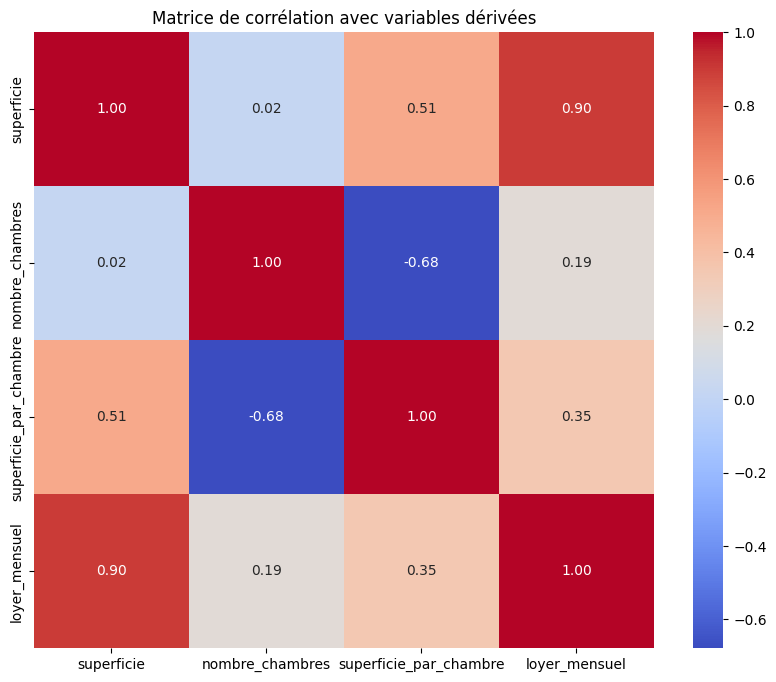

In [17]:
# Mise à jour des features avec la nouvelle variable dérivée
X = data.drop('loyer_mensuel', axis=1)
y = data['loyer_mensuel']

# Recalcul des colonnes catégorielles et numériques
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcul de la matrice de corrélation pour les variables numériques
corr_matrix = data[numerical_cols + ['loyer_mensuel']].corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation avec variables dérivées')
plt.show()

## Partie 2 : Modélisation

### Séparation train/test

In [18]:
# Mise à jour du préprocesseur avec les nouvelles colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Implémentation de la régression linéaire multiple

In [19]:
# Création du pipeline avec préprocesseur et modèle
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

### Évaluation : R², RMSE

In [20]:
# Calcul des métriques d'évaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² sur l'ensemble de test : {r2:.4f}")
print(f"RMSE sur l'ensemble de test : {rmse:.2f}")

R² sur l'ensemble de test : 0.9750
RMSE sur l'ensemble de test : 67388.70


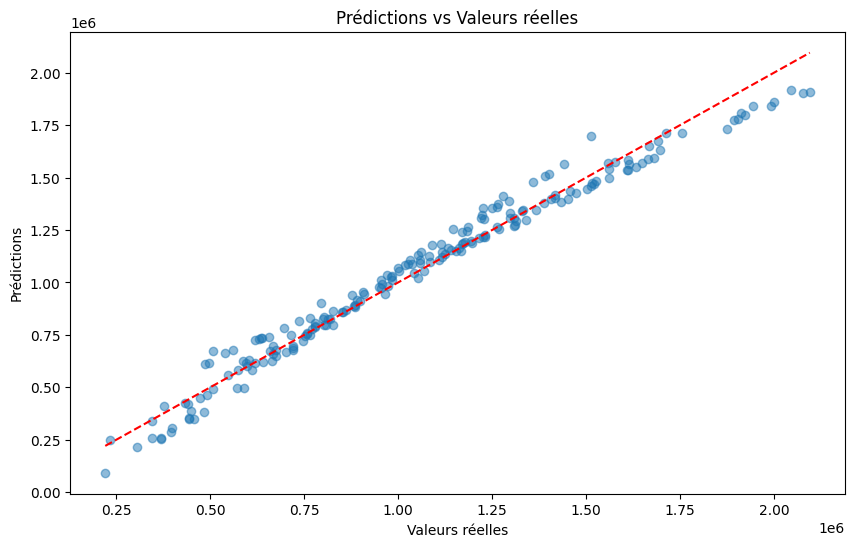

In [21]:
# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs réelles')
plt.show()

### Vérification des hypothèses d'éligibilité de la régression linéaire multiple

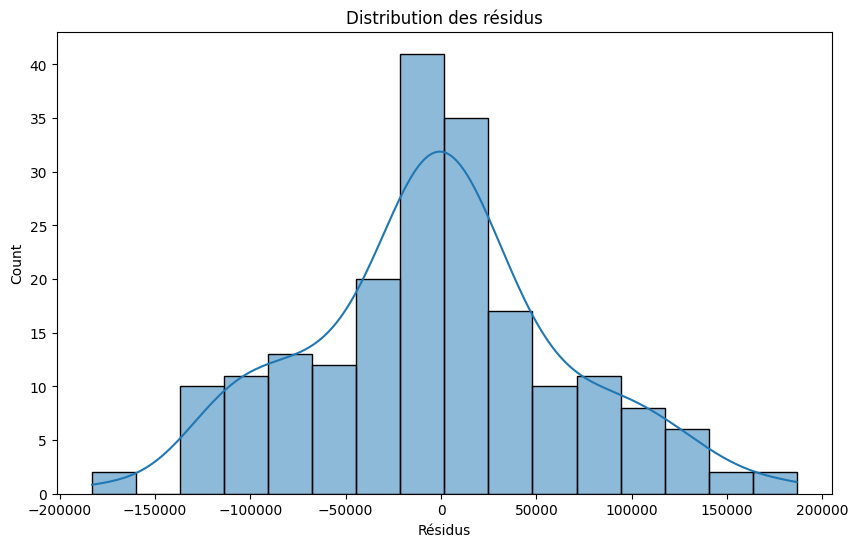

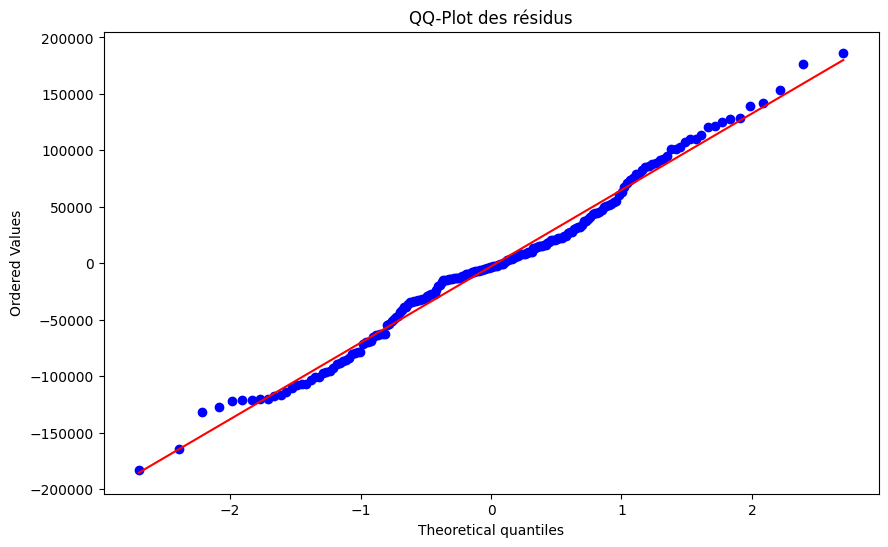

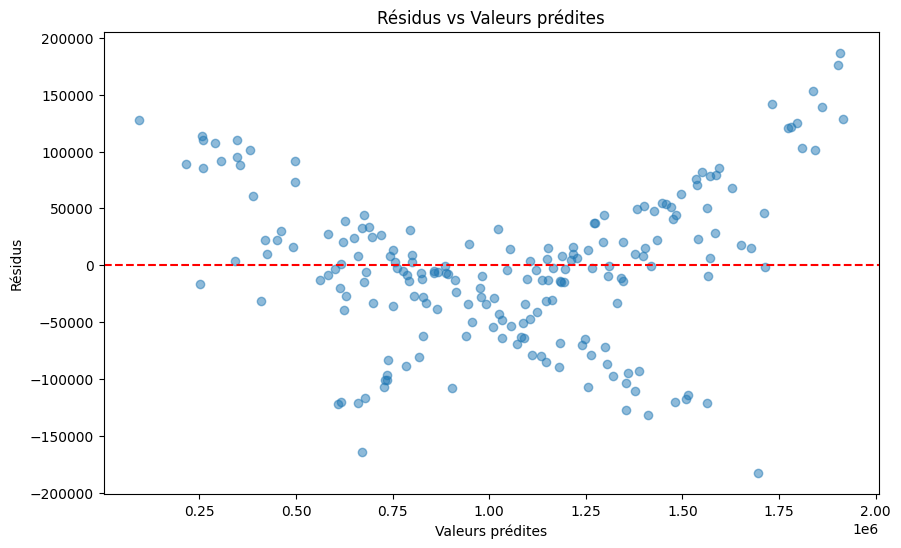

In [22]:
# Récupération des résidus
residuals = y_test - y_pred

# Distribution des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.show()

# QQ-plot pour vérifier la normalité des résidus
plt.figure(figsize=(10, 6))
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot des résidus')
plt.show()

# Résidus vs valeurs prédites (homoscédasticité)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Résidus vs Valeurs prédites')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()

## Partie 3 : Optimisation du modèle

### Sélection de variables : RFE (Recursive Feature Elimination)

In [23]:
# Prétraitement des données pour RFE
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Création d'un modèle de régression linéaire
model = LinearRegression()

# Nombre de features à sélectionner (à ajuster selon les résultats)
n_features_to_select = 10

# Application de RFE
rfe = RFE(model, n_features_to_select=n_features_to_select)
rfe.fit(X_train_preprocessed, y_train)

# Récupération des noms des features après one-hot encoding
feature_names = []
for name, transformer, cols in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(cols)
    elif name == 'cat':
        for col in cols:
            categories = transformer.categories_[cols.index(col)]
            # Skip the first category as it's dropped in one-hot encoding
            for cat in categories[1:]:
                feature_names.append(f"{col}_{cat}")

# Affichage des features sélectionnées
selected_features = [feature for feature, selected in zip(feature_names, rfe.support_) if selected]
print("Features sélectionnées par RFE :")
for feature in selected_features:
    print(f"- {feature}")

Features sélectionnées par RFE :
- superficie
- nombre_chambres
- quartier_Ambanidia
- quartier_Ambatobe
- quartier_Ambatonakanga
- quartier_Ambatoroka
- quartier_Ambodivona
- quartier_Soanierana
- état_général_mauvais
- état_général_moyen


### Création d'un modèle optimisé avec les features sélectionnées

In [24]:
# Création d'un pipeline avec RFE
pipeline_rfe = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', RFE(LinearRegression(), n_features_to_select=n_features_to_select)),
    ('regressor', LinearRegression())
])

# Entraînement du modèle optimisé
pipeline_rfe.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rfe = pipeline_rfe.predict(X_test)

# Calcul des métriques d'évaluation
r2_rfe = r2_score(y_test, y_pred_rfe)
rmse_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))

print(f"R² sur l'ensemble de test (modèle optimisé) : {r2_rfe:.4f}")
print(f"RMSE sur l'ensemble de test (modèle optimisé) : {rmse_rfe:.2f}")

# Comparaison avec le modèle initial
print(f"\nAmélioration du R² : {(r2_rfe - r2) * 100:.2f}%")
print(f"Amélioration du RMSE : {(rmse - rmse_rfe):.2f}")

R² sur l'ensemble de test (modèle optimisé) : 0.9761
RMSE sur l'ensemble de test (modèle optimisé) : 65959.47

Amélioration du R² : 0.10%
Amélioration du RMSE : 1429.23


### Sauvegarde du modèle optimisé

In [25]:
# Sauvegarde du modèle optimisé
joblib.dump(pipeline_rfe, 'modele_loyer_optimise.joblib')
print("Modèle optimisé sauvegardé sous 'modele_loyer_optimise.joblib'")








Modèle optimisé sauvegardé sous 'modele_loyer_optimise.joblib'


## Partie 4 : Préparation pour le déploiement Streamlit

In [26]:
# Extraction des coefficients du modèle optimisé pour utilisation dans Streamlit
# Cette partie sera utilisée pour créer l'application Streamlit

# Récupération du modèle final dans le pipeline
final_model = pipeline_rfe.named_steps['regressor']

# Récupération des coefficients
coefficients = final_model.coef_

# Récupération des noms des features après sélection
# Ceci est complexe car nous avons utilisé un pipeline avec préprocesseur et RFE
# Pour simplifier, nous allons juste afficher les coefficients
print("Coefficients du modèle optimisé :")
print(coefficients)

# Intercept (constante)
print(f"\nIntercept : {final_model.intercept_}")

Coefficients du modèle optimisé :
[ 413050.04634008   82493.07090316   34976.35430923   29559.04383068
   27043.04406446  -23250.06382229   27851.88305817   20288.31177887
 -409194.01889134 -204651.30156701]

Intercept : 1213333.8410702227
